# PART1: DATA EXLORATION AND VISUALISATION

In [ ]:
# IMPORTING ALL THE IMPORTANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the training as well as testing file
data_train = pd.read_csv("Train.csv")
data_test = pd.read_csv("test.csv")

In [ ]:
data_training = data_train.drop(columns=["status_group"]) # dropping the target values

In [ ]:
# looking the data and understanding the important features
data_train.head()  # printing only the first five values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [ ]:
target_value=data_train["status_group"]  # here we are generating the target values

In [ ]:
target_value.head()

0        functional
1        functional
2    non functional
3        functional
4        functional
Name: status_group, dtype: object

ANALYSIS OF THE TARGET VALUES:
HERE IN TARGET VALUES WE ARE HAVING THREE DIFFERENT TYPES OF PUMPS:
CLASSIFYING THE PUMPS INTO THREE DIFFRENT CLASSES NAMELY :

**FUNCTIONAL** :

**NON_FUNCTIONAL** :

**FUNCTIONAL NEEDS REPAIR**: 


# TRAINING FEATURES

In [ ]:
# COLUMN HEADERS OF THE TRAINING FEATURES
data_train.columns.values

array(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code',
       'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group',
       'payment', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'], dtype=object)

# ESTIMATING EACH TYPES OF PUMP WHICH IS BEING AVAILABLE IN THE TRAINING FILE

In [ ]:
target_value.value_counts()

functional                 24194
non functional             17118
functional needs repair     3238
Name: status_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


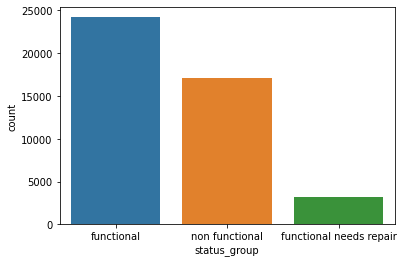

In [ ]:
#plotting the curve of each type of the pumps:
sns.countplot(target_value)

COMMENT:
FROM THE ABOVE OBSERVATION WE CAN SAY THAT THERE ARE AROUND 56% OF PUMPS WHICH ARE WORKING (FUNCTIONAL), AROUND (36% ARE NON_FUNCTIONAL AND ROUGHLY 8% ARE FUNCTIONAL NEED REPAIR

# PART-2:VARIABLE TRANSFORMATION, FEATURE ENGINEERING, FEATURE SELECTION OR ELIMINATION

cleaning the unnecessary data from the training file

In [ ]:
data_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [ ]:
# train_data.drop(["funder","installer","wpt_name","num_private","subvillage","public_meeting","recorded_by","scheme_management","scheme_name","permit","extraction_type_group","extraction_type","quantity","source","waterpoint_type"], axis =1)  #removing unnecessary columns

In [ ]:
data_train.info()  # extracting all the information about the features present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41757 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41743 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44263 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  district_code          44550 non-null  int64  
 15  lg

**CLEANSING OF DATA:**


1.   The group of features of (extraction_type, extraction_type_group, extraction_type_class), (payment, payment_type),
(water_quality, quality_group), (source, source_class), (subvillage, region, region_code, district_code, lga, ward), and (waterpoint_type, waterpoint_type_group) all contain similarkind of data and hence it is o no use to consider the same feature again therefore keeping one of them from each of the features.
2.   num_private column can be dropped because most of the values of the column are zero and hence it is not relevant to use this feature in our processing.
3.  id column can be also dropped because it is of no use as it is just a unique no associated with the each type of the pump.





In [ ]:
data_train = data_train.drop(['id','source','wpt_name', 'num_private', 'region', 
          'quantity'],axis = 1)
 
data_train = data_train.drop(['quality_group','lga','ward','management', 'payment', 
           'extraction_type_group','extraction_type_class','date_recorded','recorded_by'], axis = 1)

In [ ]:
data_train  # reading the clean data 

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,district_code,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7.0,Germany Republi,1203,CES,37.228664,-3.256505,Pangani,Mafurini,3,5,90,True,Water Board,Machame water supply,True,2008,gravity,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,Cdtf,1409,CDTF,34.615481,-9.972601,Lake Nyasa,Ituni,11,5,70,False,Private operator,Mgowel,False,1984,gravity,commercial,never pay,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
2,0.0,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Pangani,Melebuki,2,2,150,True,VWC,Saitero olosaita pipe line,True,2002,gravity,user-group,never pay,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,non functional
3,0.0,District Council,0,District Council,33.628025,-8.860795,Rufiji,Darajani,12,2,0,True,VWC,NaN,True,0,gravity,user-group,annually,soft,insufficient,river/lake,surface,communal standpipe,communal standpipe,functional
4,300.0,District Council,1283,District Council,37.655509,-3.669777,Pangani,Mwira A,3,2,34,True,VWC,Churu water supply,False,2007,gravity,user-group,monthly,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,0.0,World Vision,0,TAWASA,32.383715,-3.457624,Lake Tanganyika,Bukenge,17,3,0,True,NaN,NaN,True,0,nira/tanira,user-group,unknown,milky,enough,shallow well,groundwater,hand pump,hand pump,functional
44546,0.0,Ded,0,DED,31.615509,-2.738682,Lake Victoria,Ilyamchele Center,18,8,0,True,WUA,NaN,True,0,afridev,user-group,monthly,soft,enough,borehole,groundwater,hand pump,hand pump,non functional
44547,0.0,Government Of Tanzania,969,Government,35.134412,-10.676062,Ruvuma / Southern Coast,Masango,10,3,60,NaN,VWC,Government,NaN,1977,gravity,user-group,unknown,soft,seasonal,spring,groundwater,communal standpipe,communal standpipe,functional
44548,200.0,Adra,1269,ADRA/Government,37.886287,-4.390882,Pangani,Mng'Ende,3,3,80,True,Water authority,Kiumba water supply,True,2011,gravity,user-group,monthly,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,functional


# **ACCORDING TO MY UNDERSTANDING OF THE DATA THE REMAMINING FEATURES LEFT AFTER CLEANSING OF DATA ARE IMPORTANT IN THE MODEL ANALYSIS.** PLUS IMPORTANCE OF EACH VARIABLE

In [ ]:
data_train.columns #reamining features

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'subvillage', 'region_code', 'district_code',
       'population', 'public_meeting', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type', 'management_group',
       'payment_type', 'water_quality', 'quantity_group', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

CHECKING FOR ANY NULL DATA AND FILLING IT SUITABLY

In [ ]:
data_train.apply(lambda x: sum(x.isnull()))

amount_tsh                   0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
basin                        0
subvillage                 287
region_code                  0
district_code                0
population                   0
public_meeting            2491
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
management_group             0
payment_type                 0
water_quality                0
quantity_group               0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_group                 0
dtype: int64

**PROCESSSING THE COLUMNS HAVING THE NULL VALUE ONE BY ONE**

FUNDER COLUMN: which funder funded the pump and the type of pumps coming in the list of which funder

In [ ]:
data_train.funder.value_counts().head(15)

Government Of Tanzania    6780
Danida                    2362
Hesawa                    1639
Rwssp                     1032
Kkkt                       964
World Bank                 962
World Vision               924
Unicef                     808
Tasaf                      665
District Council           655
Dhv                        617
Dwsp                       616
Private Individual         616
0                          572
Norad                      542
Name: funder, dtype: int64

 SINCE THE FEATURES CONTANS CATEGORICAL DATA , FEATURES WITH HIGH ARITY, WE ARE KEEPING THE TOP 15 VALUES ON THE BASIS oF THE FREQUENCY AND ASSIGNING ALL TEH REMAINING VALUES TO **OTHERS**

In [ ]:
 def funder_column(row):  
    if row['funder']=='Government Of Tanzania':
        return 'Government Of Tanzania'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    elif row['funder']=='Kkkt':
        return 'Kkkt'
    elif row['funder']=='World Vision':
        return 'World Vision'
    elif row['funder']=='Unicef':
        return 'Unicef'
    elif row['funder']=='Tasaf':
        return 'Tasaf'
    elif row['funder']=='District Council':
        return 'District Council'
    elif row['funder']=='Dhv':
        return 'Dhv'
    elif row['funder']=='Private Individual ':
        return 'Private Individual '
    elif row['funder']=='Dwsp':
        return 'Dwsp'
    elif row['funder']=='0':
        return '0'
    elif row['funder']=='Norad':
        return 'Norad'

    else:
        return 'other'
    
data_train['funder'] = data_train.apply(lambda row: funder_column(row), axis=1)

ADDING NEW COLUMN AS score_values WHICH CAN BE USE AS A PIVOT TABLE TO CHECK THE DIFFERENCE BETWEEN DIFFERENT FUNDERS

In [ ]:
 VALUES_REPLACE = {'functional':2, 'functional needs repair':1, 'non functional':0}
data_train['score_values']  = data_train.status_group.replace(VALUES_REPLACE)

analysisng the different target classication with respect to the funder column using pivot table

In [ ]:
 table_pivot = pd.pivot_table(data_train,index=['funder', 'status_group'],
                           values='score_values', aggfunc='count')
table_pivot
piv_dataframe= data_train[['funder','status_group','score_values']]
table_pivot = piv_dataframe.pivot_table(index='funder',
                           columns='status_group', aggfunc='count')
table_pivot

score_values                                       
status_group             functional functional needs repair non functional
funder                                                                    
0                               321                       3            248
Dhv                             350                      44            223
District Council                294                      35            326
Dwsp                            288                     158            170
Government Of Tanzania         2781                     519           3480
Kkkt                            529                      55            380
Norad                           189                     116            237
Tasaf                           365                      53            247
Unicef                          467                      71            270
World Vision                    545                      99            280
danida                         1282                     119            961
hesawa                          692                     180            767
other                         15083                    1633           8696
rwssp                           609                      80            343
world_bank                      399                      73            490

NO of pumps in each class wrt to funder can be described above

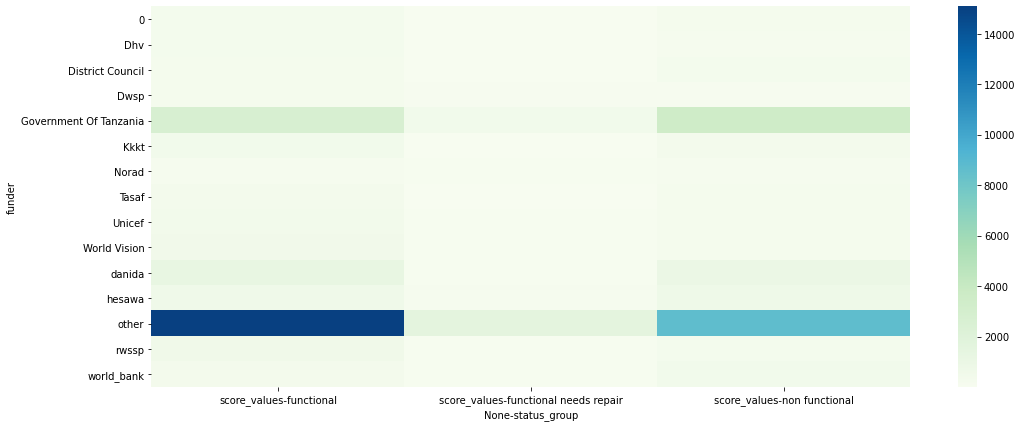

In [ ]:
from matplotlib import pyplot
dimension = (17, 7)
figure, axes = pyplot.subplots(figsize=dimension)
sns.heatmap(table_pivot, cmap = 'GnBu')

**graphical represntation of funder vs classes of pump using heatmap**

INSTALLER COLUMN: which installer installed ehich pump and  the final count of the three classes of pump wrt to the installer


In [ ]:
data_train.installer.value_counts().head(15)

DWE                   13005
Government             1365
RWE                     876
Commu                   806
DANIDA                  788
KKKT                    681
Hesawa                  622
0                       572
TCRS                    537
Central government      504
CES                     471
District Council        425
DANID                   420
Community               411
HESAWA                  404
Name: installer, dtype: int64

SINCE THE FEATURES CONTANS CATEGORICAL DATA , FEATURES WITH HIGH ARITY, WE ARE KEEPING THE TOP 15 VALUES ON THE BASIS oF THE FREQUENCY AND ASSIGNING ALL TEH REMAINING VALUES TO **OTHERS**

In [ ]:
def installer_column(row):  
    if row['installer']=='DWE':
        return 'DWE'
    elif row['installer']=='Government ':
        return 'Government '
    elif row['installer']=='RWE':
        return 'RWE'
    elif row['installer']=='Commu':
        return 'Commu'
    elif row['installer']=='DANIDA':
        return 'DANIDA'    
    elif row['installer']=='KKKT':
        return 'KKKT'
    elif row['installer']=='Hesawa':
        return 'Hesawa'
    elif row['installer']=='0':
        return '0'
    elif row['installer']=='TCRS':
        return 'TCRS'
    elif row['installer']=='Central government':
        return 'Central government'
    elif row['installer']=='CES':
        return 'CES'
    elif row['installer']=='District Council':
        return 'District Council '
    elif row['installer']=='DANID':
        return 'DANID'
    elif row['installer']=='Community ':
        return 'Community '
    elif row['installer']=='HESAWA':
        return 'HESAWA'

    else:
        return 'other'
    
data_train['installer'] = data_train.apply(lambda row: installer_column(row), axis=1)

analysisng the different target classication with respect to the installer column using pivot table

In [ ]:
piv_dataframe= data_train[['installer','status_group','score_values']]
table_pivot = piv_dataframe.pivot_table(index='installer',
                           columns='status_group', aggfunc='count')
table_pivot

score_values                                       
status_group         functional functional needs repair non functional
installer                                                             
0                           321                       3            248
CES                         409                       1             61
Central government          120                       4            380
Commu                       546                      27            233
DANID                       328                       7             85
DANIDA                      404                      64            320
DWE                        7049                    1199           4757
District Council            219                      34            172
HESAWA                      227                      30            147
Hesawa                      348                      14            260
KKKT                        311                      51            319
RWE                         229                      99            548
TCRS                        222                      34            281
other                     13461                    1671           9307

NO of pumps in each class wrt to installer can be described above

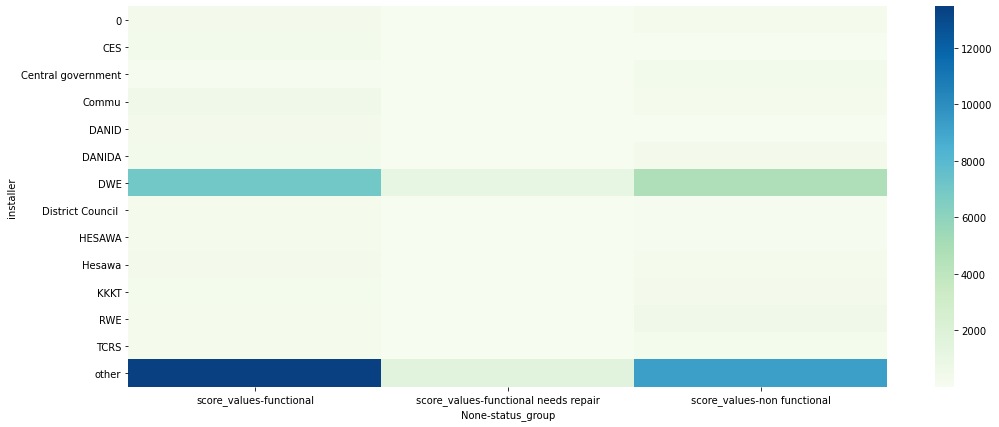

In [ ]:
figure, axes = pyplot.subplots(figsize=dimension)
sns.heatmap(table_pivot, cmap = 'GnBu')

**graphical represntation of installer vs classes of pump using heatmap**

COLUMN NAME: SUBVILLAGE (having subvillage data)

In [ ]:
data_train.subvillage.value_counts().unique

<bound method Series.unique of Madukani     403
Majengo      391
Shuleni      380
Kati         274
Mtakuja      187
            ... 
Wanikija       1
Mwalukale      1
Sefu           1
Mulumono       1
Mwanganga      1
Name: subvillage, Length: 16617, dtype: int64>

out of all data points only 16617 are having data and fills other with the others

In [ ]:
data_train.subvillage = data_train.subvillage.fillna('others')

COLUMN:SCHEME NAME

In [ ]:
data_train.scheme_name.value_counts().head(15)

K                                        528
None                                     494
Borehole                                 402
M                                        310
Chalinze wate                            300
DANIDA                                   273
Government                               238
Ngana water supplied scheme              221
wanging'ombe water supply s              186
wanging'ombe supply scheme               182
I                                        176
Bagamoyo wate                            166
N                                        160
Uroki-Bomang'ombe water sup              158
Kirua kahe gravity water supply trust    142
Name: scheme_name, dtype: int64

SINCE THE FEATURES CONTANS CATEGORICAL DATA , FEATURES WITH HIGH ARITY, WE ARE KEEPING THE TOP 15 VALUES ON THE BASIS oF THE FREQUENCY AND ASSIGNING ALL TEH REMAINING VALUES TO **OTHERS**

In [ ]:
def scheme_name_column(row):  
    if row['scheme_name']=='K':
        return 'K'
    elif row['scheme_name']=='None':
        return 'None'
    elif row['scheme_name']=='Borehole':
        return 'Borehole'
    elif row['scheme_name']=='M':
        return 'M'
    elif row['scheme_name']=='Chalinze wate':
        return 'Chalinze wate'    
    elif row['scheme_name']=='DANIDA  ':
        return 'DANIDA  '
    elif row['scheme_name']=='Government':
        return 'Government'
    elif row['scheme_name']=='Ngana water supplied scheme':
        return 'Ngana water supplied scheme'
    elif row['scheme_name']=="wanging'ombe water supply s":
        return 'wangingombe water supply s'
    elif row['scheme_name']=="wanging'ombe supply scheme":
        return 'wangingombe supply scheme'
    elif row['scheme_name']=='I':
        return 'I'
    elif row['scheme_name']=='Bagamoyo wate':
        return 'Bagamoyo wate'
    elif row['scheme_name']=='N':
        return 'N'
    elif row['scheme_name']=="Uroki-Bomang'ombe water sup":
        return "Uroki-Bomang'ombe water sup"
    elif row['scheme_name']=='Kirua kahe gravity water supply trust':
        return 'Kirua kahe gravity water supply trust'

    else:
        return 'other'
    
data_train['scheme_name'] = data_train.apply(lambda row: scheme_name_column(row), axis=1)

analysisng the different target classication with respect to the scheme_name column using pivot table

In [ ]:
piv_dataframe= data_train[['scheme_name','status_group','score_values']]
table_pivot = piv_dataframe.pivot_table(index='scheme_name',
                           columns='status_group', aggfunc='count')
table_pivot

score_values  ...               
status_group                            functional  ... non functional
scheme_name                                         ...               
Bagamoyo wate                                118.0  ...           48.0
Borehole                                     151.0  ...          231.0
Chalinze wate                                249.0  ...           51.0
Government                                   111.0  ...          105.0
I                                            107.0  ...           52.0
K                                            298.0  ...          144.0
Kirua kahe gravity water supply trust        127.0  ...           12.0
M                                            148.0  ...          115.0
N                                             97.0  ...           55.0
Ngana water supplied scheme                   49.0  ...          169.0
None                                         303.0  ...          168.0
Uroki-Bomang'ombe water sup                  130.0  ...           27.0
other                                      22077.0  ...        15854.0
wangingombe supply scheme                    116.0  ...           48.0
wangingombe water supply s                   113.0  ...           39.0

[15 rows x 3 columns]

NO of pumps in each class wrt to scheme_name can be described above

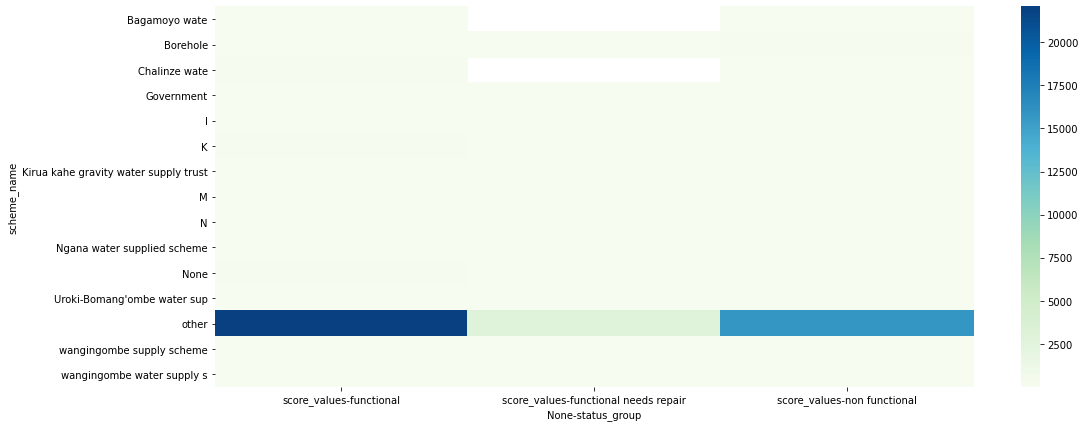

In [ ]:
figure, axes = pyplot.subplots(figsize=dimension)
sns.heatmap(table_pivot, cmap = 'GnBu')

**graphical represntation of scheme_name vs classes of pump using heatmap**

In [ ]:
# PUBLIC MEETING COLUMN  HERE WE ARE FILLING THE COLUMN WITH SOME UNKNOWN VALUES:
data_train.public_meeting = data_train.public_meeting.fillna('not_known')

In [ ]:
# SCHEME_MANAAGEMENT COLUMN  HERE WE ARE FILLING THE COLUMN WITH OTHERS:
data_train.scheme_management = data_train.scheme_management.fillna('others')

In [ ]:
# PERMIT COLUMN  HERE WE ARE FILLING THE COLUMN WITH SOME UNKNOWN VALUES:
data_train.permit = data_train.permit.fillna('not_known')

NOW CHECK FOR ANY NULL VALUES

In [ ]:
 data_train.apply(lambda x: sum(x.isnull()))

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region_code              0
district_code            0
population               0
public_meeting           0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
management_group         0
payment_type             0
water_quality            0
quantity_group           0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
score_values             0
dtype: int64

HENCE WE CAN SEE THAT THERE ARE NO NULL VALUES LEFT

In [ ]:
# CONSTRUCTION_YEAR COLUMN  HERE WE ARE FILLING THE COLUMN WITH SOME UNKNOWN VALUES:
data_train.construction_year = data_train.construction_year.fillna('not_known')

COLUNM NAME: **BASIN**

In [ ]:
data_train.basin.value_counts()

Lake Victoria              7623
Pangani                    6703
Rufiji                     6045
Internal                   5855
Lake Tanganyika            4775
Wami / Ruvu                4430
Lake Nyasa                 3902
Ruvuma / Southern Coast    3381
Lake Rukwa                 1836
Name: basin, dtype: int64

In [ ]:
#generating pivot table for basin column:
piv_dataframe= data_train[['basin','status_group','score_values']]
table_pivot = piv_dataframe.pivot_table(index='basin',
                           columns='status_group', aggfunc='count')
table_pivot

score_values                                       
status_group              functional functional needs repair non functional
basin                                                                      
Internal                        3379                     420           2056
Lake Nyasa                      2525                     195           1182
Lake Rukwa                       748                     203            885
Lake Tanganyika                 2318                     545           1912
Lake Victoria                   3793                     741           3089
Pangani                         4021                     352           2330
Rufiji                          3836                     338           1871
Ruvuma / Southern Coast         1268                     237           1876
Wami / Ruvu                     2306                     207           1917

COLUMN NAME: EXTACTION TYPE COLUMN:

In [ ]:
data_train.extraction_type.value_counts().head(16)

gravity              20127
nira/tanira           6130
other                 4768
submersible           3560
swn 80                2771
mono                  2164
india mark ii         1768
afridev               1339
ksb                   1043
other - rope pump      335
other - swn 81         177
windmill                89
india mark iii          77
cemo                    70
other - play pump       65
walimi                  39
Name: extraction_type, dtype: int64

SINCE THE FEATURES CONTANS CATEGORICAL DATA , FEATURES WITH HIGH ARITY, WE ARE KEEPING THE TOP 15 VALUES ON THE BASIS oF THE FREQUENCY AND ASSIGNING ALL TEH REMAINING VALUES TO **OTHERS**

In [ ]:
def extraction_type_column(row):  
    if row['extraction_type']=='gravity':
        return 'gravity'
    elif row['extraction_type']=='nira/tanira ':
        return 'nira/tanira '
    elif row['extraction_type']=='submersible':
        return 'submersible'
    elif row['extraction_type']=='swn 80':
        return 'swn 80'
    elif row['extraction_type']=='mono ':
        return 'mono'    
    elif row['extraction_type']=='india mark ii':
        return 'india mark ii'
    elif row['extraction_type']=='afridev':
        return 'afridev'
    elif row['extraction_type']=='ksb':
        return 'ksb'
    elif row['extraction_type']=="other - rope pump":
        return 'other - rope pump'
    elif row['extraction_type']=="other - swn 81":
        return 'other - swn 81'
    elif row['extraction_type']=='windmill':
        return 'windmill'
    elif row['extraction_type']=='cemo':
        return 'cemo'
    elif row['extraction_type']=='india mark iii':
        return 'india mark iii'
    elif row['extraction_type']=="other - play pump":
        return "other - play pump"
    elif row['extraction_type']=='walimi':
        return 'walimi'

    else:
        return 'other'
    
data_train['extraction_type'] = data_train.apply(lambda row: extraction_type_column(row), axis=1)

analysisng the different target classication with respect to the extraction_type column using pivot table

In [ ]:
piv_dataframe= data_train[['extraction_type','status_group','score_values']]
table_pivot = piv_dataframe.pivot_table(index='extraction_type',
                           columns='status_group', aggfunc='count')
table_pivot

score_values                                       
status_group        functional functional needs repair non functional
extraction_type                                                      
afridev                  924.0                    28.0          387.0
cemo                      36.0                     8.0           26.0
gravity                12046.0                  2042.0         6039.0
india mark ii           1061.0                    56.0          651.0
india mark iii            34.0                     1.0           42.0
ksb                      509.0                    22.0          512.0
other                   5659.0                   734.0         6697.0
other - play pump         23.0                     NaN           42.0
other - rope pump        212.0                    14.0          109.0
other - swn 81            98.0                     6.0           73.0
submersible             1964.0                   160.0         1436.0
swn 80                  1573.0                   152.0         1046.0
walimi                    18.0                    10.0           11.0
windmill                  37.0                     5.0           47.0

NO of pumps in each class wrt to extraction_type can be described above

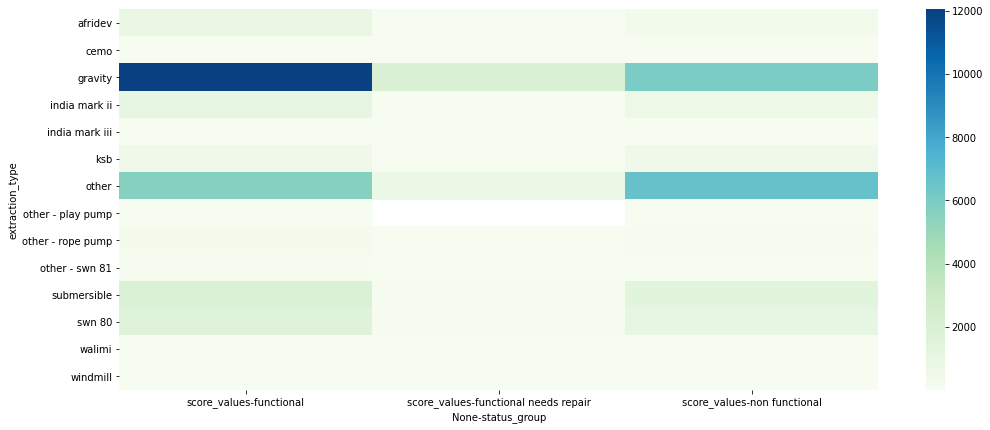

In [ ]:
figure, axes = pyplot.subplots(figsize=dimension)
sns.heatmap(table_pivot, cmap = 'GnBu')

**graphical represntation of extraction_type vs classes of pump using heatmap**

in order to decrease overfittin we are again going to drop some of te features wich are not as relevant as that of the other features

In [ ]:
data_train = data_train.drop(['management_group','longitude', 'latitude', 'region_code', 'district_code'], axis=1)

In [ ]:
# here we are dropping the scores_value which we are using for alaculation purposes above:
data_train = data_train.drop(['score_values'], axis=1)

# **FINAL DATA AFTER ALL THE PROCESSING **

In [ ]:
data_train

,amount_tsh,funder,gps_height,installer,basin,subvillage,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7.0,other,1203,CES,Pangani,Mafurini,90,True,Water Board,other,True,2008,gravity,per bucket,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,other,1409,other,Lake Nyasa,Ituni,70,False,Private operator,other,False,1984,gravity,never pay,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
2,0.0,Government Of Tanzania,1572,DWE,Pangani,Melebuki,150,True,VWC,other,True,2002,gravity,never pay,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,non functional
3,0.0,District Council,0,District Council,Rufiji,Darajani,0,True,VWC,other,True,0,gravity,annually,soft,insufficient,river/lake,surface,communal standpipe,communal standpipe,functional
4,300.0,District Council,1283,District Council,Pangani,Mwira A,34,True,VWC,other,False,2007,gravity,monthly,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,0.0,World Vision,0,other,Lake Tanganyika,Bukenge,0,True,others,other,True,0,other,unknown,milky,enough,shallow well,groundwater,hand pump,hand pump,functional
44546,0.0,other,0,other,Lake Victoria,Ilyamchele Center,0,True,WUA,other,True,0,afridev,monthly,soft,enough,borehole,groundwater,hand pump,hand pump,non functional
44547,0.0,Government Of Tanzania,969,other,Ruvuma / Southern Coast,Masango,60,not_known,VWC,Government,not_known,1977,gravity,unknown,soft,seasonal,spring,groundwater,communal standpipe,communal standpipe,functional
44548,200.0,other,1269,other,Pangani,Mng'Ende,80,True,Water authority,other,True,2011,gravity,monthly,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,functional


**CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix
labels=['functional','functional needs repair','non functional']
def confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=1)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=60, ha='right', fontsize=15)
    plt.yticks(tick_marks, labels , fontsize=15)
    plt.tight_layout()
    plt.ylabel('True_label', fontsize=15)
    plt.xlabel('Predicted_label', fontsize=15)

TRANSFORMING THE CATEGORICAL FEATUES AND CONVERTING THEM INTO THE LIST

In [ ]:
def transform(dataframe, column):
    unique_values = set(dataframe[column].tolist())
    transformer_dict = {}
    for index, value in enumerate(unique_values):
        transformer_dict[value] = index
    dataframe[column] = dataframe[column].apply(lambda y: transformer_dict[y])
    return dataframe

In [ ]:
integer_columns = ['population','gps_height'] 
columns_to_transform = [col for col in data_train.columns if col not in integer_columns]
for column in columns_to_transform: 
    data_train = transform(data_train, column)

SPLITTING THE DATA INTO TEST AND TRAIN

In [ ]:
data_train_n=data_train.drop(['status_group'], axis=1)

In [ ]:
data_x = data_train_n.to_numpy()
data_y = data_train["status_group"].tolist()

In [ ]:
# spliiting the data into training and testing file
import sklearn.model_selection 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data_x, data_y, test_size=0.3, random_state = 0)

# PART4:HYPERPARAMETER TUNING

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability/robustness over a single estimator.

HERE WE ARE USING THE ENSEMBLE METHOD: THE GOAL IS TO COMBINE THE PREDICTION OF SEVERAL BASE ESTIMATOR HAING A LEANING ALGORITH WHICH IMPROVE ROBUSTNESS OVER A SINGLE ESTIMATOR

1) **RANDOM FOREST**

In [ ]:
import sklearn.ensemble
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, min_samples_split=6, criterion='gini',  max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

In [ ]:
rfc.fit(x_train, y_train)
 
print('Random Forest Classifier Score of train accuracy :', rfc.score(x_train, y_train))
print('Random Forest Classifier Score of test accuracy :', rfc.score(x_test, y_test))

Random Forest Classifier Score of train accuracy : 0.9344556677890011
Random Forest Classifier Score of test accuracy : 0.7880284324728769


feature importance

In [ ]:
print(rfc.feature_importances_)

[0.03601002 0.04513294 0.08767326 0.03053837 0.05117395 0.13041177
 0.06058535 0.01687645 0.03707287 0.01078804 0.01999902 0.07817391
 0.04309576 0.05247223 0.02038601 0.13944952 0.03399342 0.01352826
 0.05422523 0.03841361]


Text(0, 0.5, 'Importance')

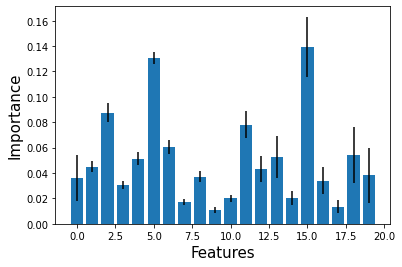

In [ ]:
importance = rfc.feature_importances_
importance = pd.DataFrame(importance, index=data_train_n.columns, 
                          columns=["Importance"])
 
importance["Std"] = np.std([tree.feature_importances_ 
                            for tree in rfc.estimators_], axis=0)
 
X = range(importance.shape[0])
Y = importance.iloc[:, 0]
y_err = importance.iloc[:, 1]
lables = list(data_train.columns.values)
 
 
 
ax = plt.bar(X, Y, yerr=y_err ,align="center")
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Importance', fontsize = 15)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predicted = rfc.predict(x_test)

In [ ]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.25      0.36       970
           1       0.78      0.89      0.83      7290
           2       0.82      0.74      0.78      5105

    accuracy                           0.79     13365
   macro avg       0.73      0.63      0.66     13365
weighted avg       0.78      0.79      0.78     13365



**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini',
                            max_depth = 10,
                            max_features = 'auto',
                            random_state = 1,
                            splitter = 'best')

In [ ]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
print("Train Score :", dtc.score(x_train, y_train))
print("Test Score :", dtc.score(x_test, y_test))

Train Score : 0.7414462081128748
Test Score : 0.7084175084175084


In [ ]:
predt = dtc.predict(x_test)
report = classification_report(y_test, predt)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.11      0.18       970
           1       0.72      0.81      0.77      7290
           2       0.69      0.67      0.68      5105

    accuracy                           0.71     13365
   macro avg       0.63      0.53      0.54     13365
weighted avg       0.69      0.71      0.69     13365



EXTRA TREE CLASSIFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
 
ETC = ExtraTreesClassifier(n_estimators=1000,min_samples_split=10)

In [ ]:
ETC.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print('Extra Tree Classifier Score training:',ETC.score(x_train, y_train))
print('Extra Tree Classifier Score  test :',ETC.score(x_test, y_test))

Extra Tree Classifier Score training: 0.9061728395061729
Extra Tree Classifier Score  test : 0.7872802095024317


LINE SEARCH CV

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe = Pipeline([('scl', StandardScaler()), ('clf', LinearSVC())])

In [ ]:
param_grid = {'clf__C':[0.01],'clf__class_weight':[None]}

In [ ]:
estimator = GridSearchCV(estimator=pipe,param_grid=param_grid,n_jobs=-1)

In [ ]:
estimator.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='squared_hinge',
                                                  max_iter=1000,
                                                  multi_class='ovr',
                                                  penalty='l2',
                                                  random_state=None, tol=0.0001,
                                  

In [ ]:
print('Linear Search CV Training Score :',estimator.score(x_train, y_train))
print('Linear Search CV Test Score :',estimator.score(x_test, y_test))

Linear Search CV Training Score : 0.6521083854417188
Linear Search CV Test Score : 0.6502057613168725


GRADIENT BOOSTING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier()

In [ ]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print('Extra Tree Classifier Training Score :',GBC.score(x_train, y_train))
print('Extra Tree Classifier Test Score :',GBC.score(x_test, y_test))

Extra Tree Classifier Training Score : 0.7517396184062851
Extra Tree Classifier Test Score : 0.7406659184436962


In [ ]:
etcpredicted = GBC.predict(x_test)
report = classification_report(y_test, etcpredicted)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.04      0.07       970
           1       0.71      0.91      0.80      7290
           2       0.81      0.63      0.70      5105

    accuracy                           0.74     13365
   macro avg       0.71      0.53      0.53     13365
weighted avg       0.74      0.74      0.71     13365



#PART 5&6: IMPORTANCE OF EACH VARIABLE USING RECURSIVE FEATURE ELIMINATION

# tsne

In [ ]:
i=data_train["status_group"]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


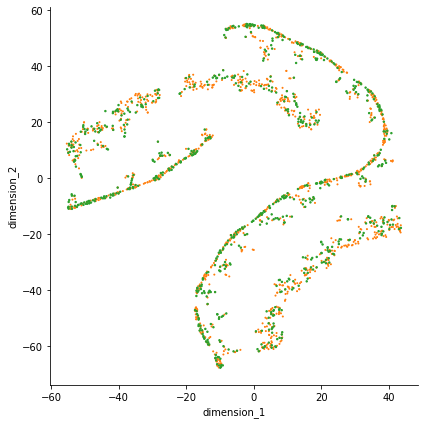

In [ ]:
from sklearn.manifold import TSNE
# picking only top 2000 points as the time taken fir all the points are extremely large 
data_2000=data_train_n.iloc[0:2000,:]
tagets_2000=i[0:2000]
model=TSNE(n_components=2, random_state=0)
tsne_data=model.fit_transform(data_2000)
# creasting the new data which helps in plotting the result:
tsne_data=np.vstack((tsne_data.T, tagets_2000)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("dimension_1","dimension_2","target"))

# plotting the result of tsne
sns.FacetGrid(tsne_df, hue="target", size=6).map(plt.scatter,"dimension_1","dimension_2","target")
plt.show()

# PART7:SUBMITTING THE FINAL LABLES


In [ ]:
data_train_n.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin',
       'subvillage', 'population', 'public_meeting', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'payment_type', 'water_quality', 'quantity_group', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [ ]:
# final data which we use after all the data preprocessing
data_train_n

,amount_tsh,funder,gps_height,installer,basin,subvillage,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group
0,5,10,1203,1,5,14701,90,1,7,10,1,49,3,6,4,4,3,1,5,4
1,0,10,1409,10,2,13378,70,0,2,10,0,25,3,0,4,4,3,1,5,4
2,0,12,1572,5,5,8429,150,1,5,10,1,43,3,0,4,3,3,1,5,4
3,0,0,0,3,3,11193,0,1,5,10,1,0,3,4,4,3,1,2,5,4
4,57,0,1283,3,5,3935,34,1,5,10,0,48,3,2,4,3,3,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,0,9,0,10,1,12456,0,1,9,10,1,0,10,1,6,4,6,1,0,0
44546,0,10,0,10,0,16574,0,1,3,10,1,0,13,2,4,4,0,1,0,0
44547,0,12,969,10,6,10208,60,2,5,9,2,18,3,1,4,1,3,1,5,4
44548,45,10,1269,10,5,13354,80,1,10,10,1,52,3,2,4,3,3,1,5,4


In [ ]:
#final lable
i.to_csv('final_label.csv', index=True)

In [ ]:
final_l=pd.read_csv("final_label.csv")

In [ ]:
final_l=final_l.drop(["Unnamed: 0"],axis=1)

In [ ]:
final_l.head(20)

,status_group
0,1
1,1
2,2
3,1
4,1
5,2
6,2
7,1
8,1
9,0


PROCESSING OF THE TEST DATA

In [ ]:
data_test = data_test.drop(['longitude', 'latitude', 'region_code', 'district_code',
                  'num_private', 'id', 'payment', 'management_group', 'management', 
                  'extraction_type_class', 'extraction_type_group', 'recorded_by','region', 'lga',
                  'ward', 'wpt_name', 'quantity',
                 'quality_group', 'source'], axis=1)

In [ ]:
data_test.permit = data_test.permit.fillna('Unknown')
data_test.public_meeting = data_test.public_meeting.fillna('Unknown')

In [ ]:
data_test['scheme_name'] = data_test.apply(lambda row: scheme_name_column(row), axis=1)
data_test['installer'] = data_test.apply(lambda row: installer_column(row), axis=1)
data_test['funder'] = data_test.apply(lambda row: funder_column(row), axis=1)
data_test['extraction_type'] = data_test.apply(lambda row: extraction_type_column(row), axis=1)

In [ ]:
data_test

,Unnamed: 0,amount_tsh,date_recorded,funder,gps_height,installer,basin,subvillage,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,0.0,2011-02-25,other,1676,other,Rufiji,Mahanzi,769,True,VWC,other,True,2004,gravity,never pay,soft,dry,spring,groundwater,communal standpipe,communal standpipe
1,1,0.0,2011-04-17,other,0,DWE,Wami / Ruvu,Uzunguni,0,True,VWC,other,False,0,other,never pay,soft,enough,borehole,groundwater,communal standpipe,communal standpipe
2,2,0.0,2011-03-27,other,0,other,Rufiji,Uganda,0,True,VWC,other,True,0,other,never pay,soft,enough,shallow well,groundwater,hand pump,hand pump
3,3,0.0,2011-07-14,other,0,other,Lake Victoria,Nyamilanda A,0,True,VWC,other,True,0,other,never pay,soft,enough,shallow well,groundwater,hand pump,hand pump
4,4,0.0,2011-07-31,World Vision,0,other,Lake Victoria,Ibosa,0,True,VWC,other,True,0,gravity,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,6113,0.0,2013-08-03,World Vision,541,other,Pangani,Mpirani,240,True,Water authority,other,True,1994,gravity,never pay,soft,enough,river/lake,surface,communal standpipe,communal standpipe
6114,6114,0.0,2011-07-12,other,0,other,Lake Victoria,Miembeni,0,True,VWC,other,True,0,other,never pay,soft,insufficient,borehole,groundwater,communal standpipe multiple,communal standpipe
6115,6115,0.0,2011-07-19,other,0,other,Lake Victoria,1,0,False,VWC,other,True,0,other,never pay,soft,enough,shallow well,groundwater,other,other
6116,6116,0.0,2011-03-17,Government Of Tanzania,461,RWE,Wami / Ruvu,Majengo,140,True,VWC,Borehole,True,1977,gravity,never pay,soft,enough,borehole,groundwater,communal standpipe,communal standpipe
